In [1]:
%matplotlib inline

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

def crosstab(df, index, columns, **kwargs):
    idx = [df[i] for i in index] if isinstance(index, list) else df[index]
    cols = [df[c] for c in columns] if isinstance(columns, list) else df[columns] 
    return pd.crosstab(idx, cols, **kwargs)

def fisher_exact(x, func=scipy.stats.fisher_exact):
    return pd.Series(func(x), index=('odds', 'p'))

def pearsonr(df, left, right, func=scipy.stats.pearsonr):
    df = df[[left, right]].dropna()
    name = '%s & %s' % (left, right)
    return pd.Series(func(df[left], df[right]), index=('r', 'p'), name=name)

FILE = 'nonportmanteau.csv'
RENAME = {'Quechua (Ayacucho)': 'Quechua', 'Tlachichilco Tepehuan': 'Tepehuan'}

tb = pd.read_csv(FILE, keep_default_na=False, na_values='')

tb['Language'] = tb['Language'].replace(RENAME)
tb['Discharger'] = tb['Discharger']\
    .str.replace('Fifty', '50').str.replace('Sixty', '60')\
    .str.replace('Hundred', '/100').str.replace('Discharger', '')

tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13430 entries, 0 to 13429
Data columns (total 7 columns):
Language      13430 non-null object
Discharger    13430 non-null object
Cell          13430 non-null object
Trans         13430 non-null bool
Local         13430 non-null bool
Direct        13430 non-null bool
Form          7354 non-null object
dtypes: bool(3), object(4)
memory usage: 459.1+ KB


In [2]:
tb.head()

,Language,Discharger,Cell,Trans,Local,Direct,Form
0,Ainu,None,1s,False,False,False,ku
1,Ainu,None,1p,False,False,False,as
2,Ainu,None,2s,False,False,False,e
3,Ainu,None,2p,False,False,False,eci
4,Ainu,None,3s,False,False,False,NaN


In [3]:
disc = tb['Discharger'].unique()
disc.tolist()

['None',
 'Intrans',
 'FreePerfect',
 'Free60/100',
 'Free50/100',
 'Free60',
 'AllPerfect',
 'All60/100',
 'All50/100',
 'All60']

In [4]:
ff = tb[tb['Trans']].groupby(['Language', 'Discharger', 'Local'])['Form'].count()\
    .unstack(['Discharger', 'Local'])
ff[disc]

Discharger   None       Intrans       FreePerfect       Free60/100        \
Local       False True    False True        False True       False True    
Language                                                                   
Ainu           29     8      19     4          25     6         19     6   
Aleut          45    18      27     0          39    18         26    15   
Bella Coola    20     8      15     6          18     8          3     5   
Chuckchi       19     8      19     4          19     8          5     6   
Darai          20     8      14     2          16     2         16     2   
Fox            32     8      32     8          32     8         30     8   
Hixkaryana     22     6       8     2          20     6         16     4   
Jaqaru          7     3       3     3           6     3          4     3   
Jumjum         28     8      18     8          24     8         22     8   
Karuk          20     8       9     6          19     7         15     5   
Ket            84     8      74     8          76     8         52     8   
Kunama         57    18      47    16          52    18         42    12   
Lakhota        23     8      13     6          18     7          0     2   
Maricopa       16     8       4     8          16     8          4     4   
Maung          96     8      80     8          96     8         91     7   
Mordvin        20     8      20     7          20     8         11     2   
Nocte          20     8      12     8          18     4         12     2   
Quechua        24     8      10     8          19     8          9     6   
Reyesano       20     8       0     0          16     0          0     0   
Sahu           96     8      79     6          54     5         52     5   
Siuslawan      57    18      57    18          53    18         53    18   
Tepehuan       23     8      17     8          22     8         14     8   
Thangmi        20     8      10     2          18     6          6     1   
Turkana        20     8       2     2          20     8         14     8   
Wardaman       27     8      20     8          23     8         20     8   
Yimas          45    18      45    18          45    18         45    18   

Discharger  Free50/100       Free60       AllPerfect       All60/100        \
Local            False True   False True       False True      False True    
Language                                                                     
Ainu                 9     0      0     0         25     6        19     6   
Aleut               20     6     20     9         39    18        26    15   
Bella Coola          3     5      3     5         18     8         3     5   
Chuckchi             5     6      5     4         19     8         5     6   
Darai               16     2     16     2         14     2         0     0   
Fox                 24     8     24     4         32     8        14     8   
Hixkaryana          16     4      8     0         20     6        16     4   
Jaqaru               4     3      4     3          4     3         1     1   
Jumjum              22     8     20     8         24     8        12     5   
Karuk               11     5      5     2         19     7        14     4   
Ket                 52     8     46     8         64     0        20     0   
Kunama              28     4     27     0         32     8        30     6   
Lakhota              0     2      0     2         18     7         0     2   
Maricopa             0     0      0     0         16     8         4     4   
Maung               63     1     75     2         95     8        22     0   
Mordvin             11     2      9     1         14     5        10     2   
Nocte               12     2      8     2         18     4        12     2   
Quechua              9     6      5     6         19     7         4     4   
Reyesano             0     0      0     0         16     0         0     0   
Sahu                36     5      0     0         54     5        52     5   
S

In [5]:
ff.sum().unstack('Local').loc[disc]

Local,False,True
Discharger,,
None,890,241
Intrans,654,174
FreePerfect,784,214
Free60/100,581,171
Free50/100,429,115
Free60,340,94
AllPerfect,731,185
All60/100,328,108
All50/100,235,76


In [6]:
df = 100 * ff / ff['None']
df.mean().unstack('Local').loc[disc]

Local,False,True
Discharger,,
None,100.000000,100.000000
Intrans,64.860601,72.489316
FreePerfect,89.592801,87.019231
Free60/100,58.145222,68.429487
Free50/100,45.055730,50.320513
Free60,34.662631,39.583333
AllPerfect,84.155698,77.617521
All60/100,35.464207,43.482906
All50/100,26.239827,32.905983


In [7]:
df.round().astype(int)[disc]

Discharger   None       Intrans       FreePerfect       Free60/100        \
Local       False True    False True        False True       False True    
Language                                                                   
Ainu          100   100      66    50          86    75         66    75   
Aleut         100   100      60     0          87   100         58    83   
Bella Coola   100   100      75    75          90   100         15    62   
Chuckchi      100   100     100    50         100   100         26    75   
Darai         100   100      70    25          80    25         80    25   
Fox           100   100     100   100         100   100         94   100   
Hixkaryana    100   100      36    33          91   100         73    67   
Jaqaru        100   100      43   100          86   100         57   100   
Jumjum        100   100      64   100          86   100         79   100   
Karuk         100   100      45    75          95    88         75    62   
Ket           100   100      88   100          90   100         62   100   
Kunama        100   100      82    89          91   100         74    67   
Lakhota       100   100      57    75          78    88          0    25   
Maricopa      100   100      25   100         100   100         25    50   
Maung         100   100      83   100         100   100         95    88   
Mordvin       100   100     100    88         100   100         55    25   
Nocte         100   100      60   100          90    50         60    25   
Quechua       100   100      42   100          79   100         38    75   
Reyesano      100   100       0     0          80     0          0     0   
Sahu          100   100      82    75          56    62         54    62   
Siuslawan     100   100     100   100          93   100         93   100   
Tepehuan      100   100      74   100          96   100         61   100   
Thangmi       100   100      50    25          90    75         30    12   
Turkana       100   100      10    25         100   100         70   100   
Wardaman      100   100      74   100          85   100         74   100   
Yimas         100   100     100   100         100   100        100   100   

Discharger  Free50/100       Free60       AllPerfect       All60/100        \
Local            False True   False True       False True      False True    
Language                                                                     
Ainu                31     0      0     0         86    75        66    75   
Aleut               44    33     44    50         87   100        58    83   
Bella Coola         15    62     15    62         90   100        15    62   
Chuckchi            26    75     26    50        100   100        26    75   
Darai               80    25     80    25         70    25         0     0   
Fox                 75   100     75    50        100   100        44   100   
Hixkaryana          73    67     36     0         91   100        73    67   
Jaqaru              57   100     57   100         57   100        14    33   
Jumjum              79   100     71   100         86   100        43    62   
Karuk               55    62     25    25         95    88        70    50   
Ket                 62   100     55   100         76     0        24     0   
Kunama              49    22     47     0         56    44        53    33   
Lakhota              0    25      0    25         78    88         0    25   
Maricopa             0     0      0     0        100   100        25    50   
Maung               66    12     78    25         99   100        23     0   
Mordvin             55    25     45    12         70    62        50    25   
Nocte               60    25     40    25         90    50        60    25   
Quechua             38    75     21    75         79    88        17    50   
Reyesano             0     0      0     0         80     0         0     0   
Sahu                38    62      0     0         56    62        54    62   
S

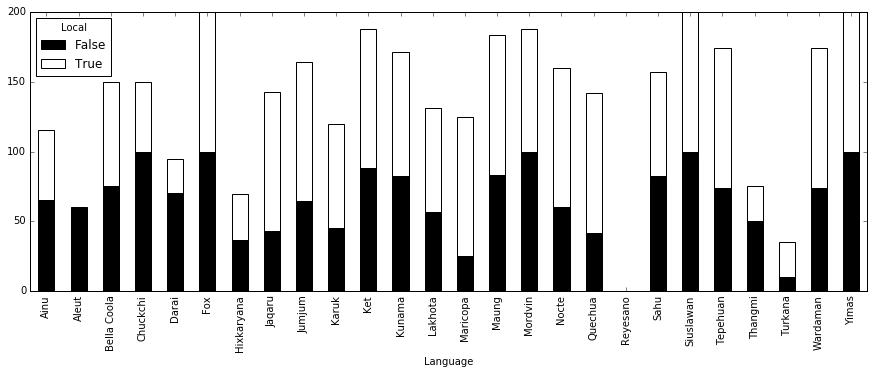

In [8]:
df['Intrans'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

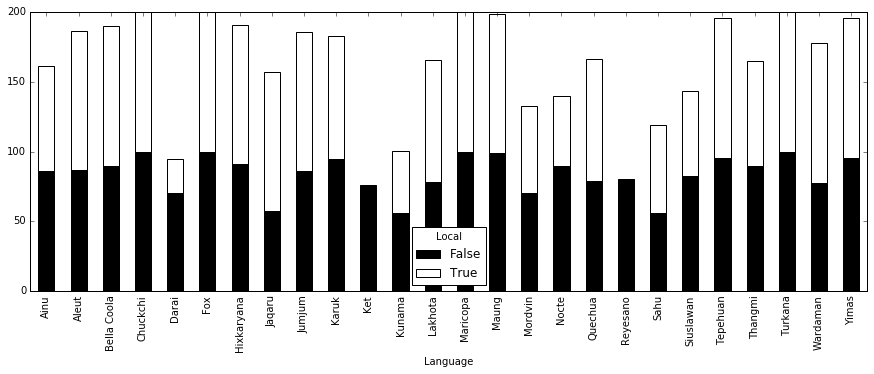

In [9]:
df['AllPerfect'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

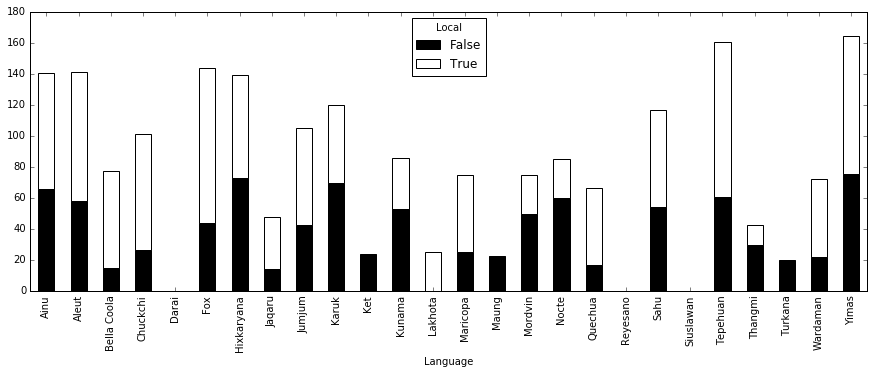

In [10]:
df['All60/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

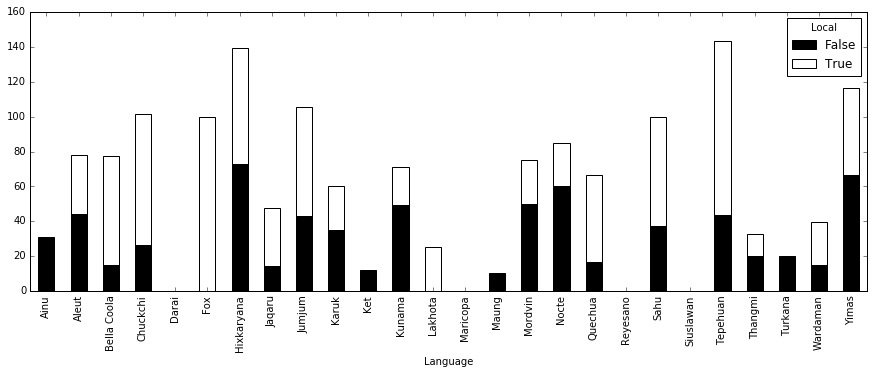

In [11]:
df['All50/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

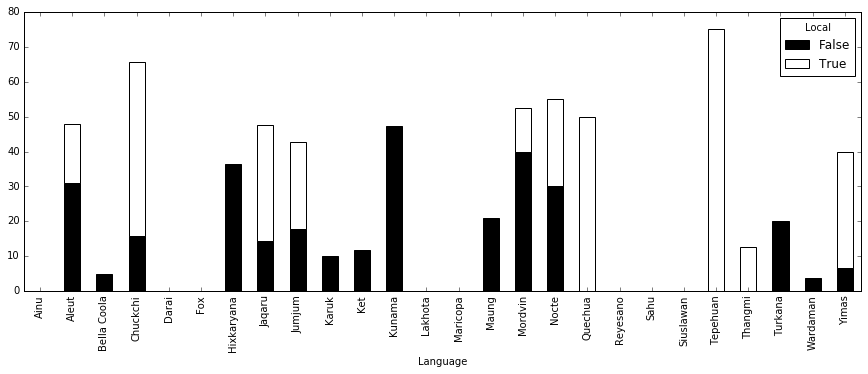

In [12]:
df['All60'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

In [13]:
df.stack('Local').corr().loc[disc[1:], disc[1:]]

Discharger,Intrans,FreePerfect,Free60/100,Free50/100,Free60,AllPerfect,All60/100,All50/100,All60
Discharger,,,,,,,,,
Intrans,1.000000,0.385622,0.450496,0.422237,0.409808,0.100372,0.181019,0.211517,0.172892
FreePerfect,0.385622,1.000000,0.535841,0.347679,0.350159,0.670971,0.302966,0.256339,0.217824
Free60/100,0.450496,0.535841,1.000000,0.670234,0.624852,0.306996,0.407894,0.326037,0.234178
Free50/100,0.422237,0.347679,0.670234,1.000000,0.840166,0.208151,0.522919,0.638048,0.428336
Free60,0.409808,0.350159,0.624852,0.840166,1.000000,0.163024,0.249879,0.320272,0.457837
AllPerfect,0.100372,0.670971,0.306996,0.208151,0.163024,1.000000,0.446834,0.339513,0.183914
All60/100,0.181019,0.302966,0.407894,0.522919,0.249879,0.446834,1.000000,0.820271,0.425964
All50/100,0.211517,0.256339,0.326037,0.638048,0.320272,0.339513,0.820271,1.000000,0.573646
All60,0.172892,0.217824,0.234178,0.428336,0.457837,0.183914,0.425964,0.573646,1.000000


In [14]:
df.stack(['Local', 'Discharger']).to_frame('Ratio').reset_index('Local')\
    .groupby(level='Discharger').apply(lambda x: pearsonr(x, 'Local', 'Ratio')).loc[disc]

Local & Ratio,r,p
Discharger,,
None,NaN,1.000000
Intrans,0.123610,0.382633
FreePerfect,-0.066892,0.637520
Free60/100,0.171901,0.223012
Free50/100,0.082854,0.559254
Free60,0.075947,0.592564
AllPerfect,-0.137421,0.331306
All60/100,0.139123,0.325293
All50/100,0.124082,0.380807


In [15]:
df.where(df.any(axis=1, level='Discharger'))\
    .stack(['Local', 'Discharger']).to_frame('Ratio').reset_index('Local')\
    .groupby(level='Discharger').apply(lambda x: pearsonr(x, 'Local', 'Ratio')).loc[disc]

Local & Ratio,r,p
Discharger,,
None,NaN,1.000000
Intrans,0.140772,0.329511
FreePerfect,-0.066892,0.637520
Free60/100,0.193480,0.178217
Free50/100,0.095686,0.517669
Free60,0.094629,0.541198
AllPerfect,-0.137421,0.331306
All60/100,0.170203,0.258107
All50/100,0.152771,0.322164


In [16]:
nf = df.div(df.sum(axis=1, level='Discharger'), axis=0)
nf.round(2)[disc]

Discharger   None       Intrans       FreePerfect       Free60/100        \
Local       False True    False True        False True       False True    
Language                                                                   
Ainu          0.5   0.5    0.57  0.43        0.53  0.47       0.47  0.53   
Aleut         0.5   0.5    1.00  0.00        0.46  0.54       0.41  0.59   
Bella Coola   0.5   0.5    0.50  0.50        0.47  0.53       0.19  0.81   
Chuckchi      0.5   0.5    0.67  0.33        0.50  0.50       0.26  0.74   
Darai         0.5   0.5    0.74  0.26        0.76  0.24       0.76  0.24   
Fox           0.5   0.5    0.50  0.50        0.50  0.50       0.48  0.52   
Hixkaryana    0.5   0.5    0.52  0.48        0.48  0.52       0.52  0.48   
Jaqaru        0.5   0.5    0.30  0.70        0.46  0.54       0.36  0.64   
Jumjum        0.5   0.5    0.39  0.61        0.46  0.54       0.44  0.56   
Karuk         0.5   0.5    0.38  0.62        0.52  0.48       0.55  0.45   
Ket           0.5   0.5    0.47  0.53        0.48  0.52       0.38  0.62   
Kunama        0.5   0.5    0.48  0.52        0.48  0.52       0.52  0.48   
Lakhota       0.5   0.5    0.43  0.57        0.47  0.53       0.00  1.00   
Maricopa      0.5   0.5    0.20  0.80        0.50  0.50       0.33  0.67   
Maung         0.5   0.5    0.45  0.55        0.50  0.50       0.52  0.48   
Mordvin       0.5   0.5    0.53  0.47        0.50  0.50       0.69  0.31   
Nocte         0.5   0.5    0.38  0.62        0.64  0.36       0.71  0.29   
Quechua       0.5   0.5    0.29  0.71        0.44  0.56       0.33  0.67   
Reyesano      0.5   0.5     NaN   NaN        1.00  0.00        NaN   NaN   
Sahu          0.5   0.5    0.52  0.48        0.47  0.53       0.46  0.54   
Siuslawan     0.5   0.5    0.50  0.50        0.48  0.52       0.48  0.52   
Tepehuan      0.5   0.5    0.42  0.57        0.49  0.51       0.38  0.62   
Thangmi       0.5   0.5    0.67  0.33        0.55  0.45       0.71  0.29   
Turkana       0.5   0.5    0.29  0.71        0.50  0.50       0.41  0.59   
Wardaman      0.5   0.5    0.43  0.57        0.46  0.54       0.43  0.57   
Yimas         0.5   0.5    0.50  0.50        0.50  0.50       0.50  0.50   

Discharger  Free50/100       Free60       AllPerfect       All60/100        \
Local            False True   False True       False True      False True    
Language                                                                     
Ainu              1.00  0.00    NaN   NaN       0.53  0.47      0.47  0.53   
Aleut             0.57  0.43   0.47  0.53       0.46  0.54      0.41  0.59   
Bella Coola       0.19  0.81   0.19  0.81       0.47  0.53      0.19  0.81   
Chuckchi          0.26  0.74   0.34  0.66       0.50  0.50      0.26  0.74   
Darai             0.76  0.24   0.76  0.24       0.74  0.26       NaN   NaN   
Fox               0.43  0.57   0.60  0.40       0.50  0.50      0.30  0.70   
Hixkaryana        0.52  0.48   1.00  0.00       0.48  0.52      0.52  0.48   
Jaqaru            0.36  0.64   0.36  0.64       0.36  0.64      0.30  0.70   
Jumjum            0.44  0.56   0.42  0.58       0.46  0.54      0.41  0.59   
Karuk             0.47  0.53   0.50  0.50       0.52  0.48      0.58  0.42   
Ket               0.38  0.62   0.35  0.65       1.00  0.00      1.00  0.00   
Kunama            0.69  0.31   1.00  0.00       0.56  0.44      0.61  0.39   
Lakhota           0.00  1.00   0.00  1.00       0.47  0.53      0.00  1.00   
Maricopa           NaN   NaN    NaN   NaN       0.50  0.50      0.33  0.67   
Maung             0.84  0.16   0.76  0.24       0.50  0.50      1.00  0.00   
Mordvin           0.69  0.31   0.78  0.22       0.53  0.47      0.67  0.33   
Nocte             0.71  0.29   0.62  0.38       0.64  0.36      0.71  0.29   
Quechua           0.33  0.67   0.22  0.78       0.48  0.52      0.25  0.75   
Reyesano           NaN   NaN    NaN   NaN       1.00  0.00       NaN   NaN   
Sahu              0.38  0.62    NaN   NaN       0.47  0.53      0.46  0.54   
S

In [17]:
nf.stack(['Local', 'Discharger']).to_frame('Ratio').reset_index('Local')\
    .groupby(level='Discharger').apply(lambda x: pearsonr(x, 'Local', 'Ratio')).loc[disc]\
    .style.applymap(lambda x: x < .05 and 'background-color: lime' or '', subset=['p'])\
    .set_uuid('16')

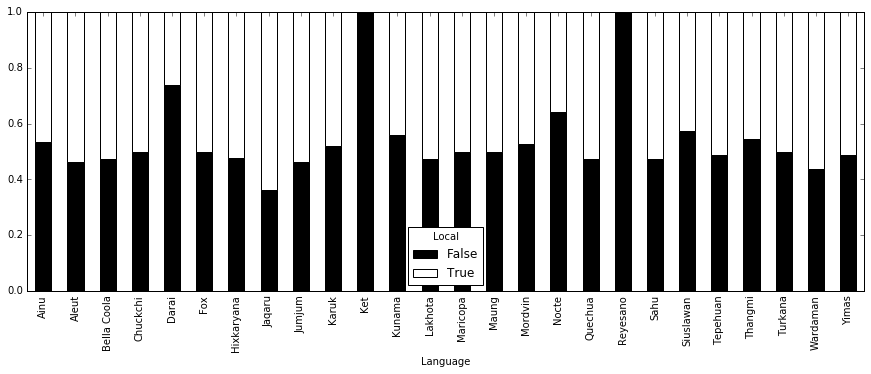

In [18]:
nf['AllPerfect'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

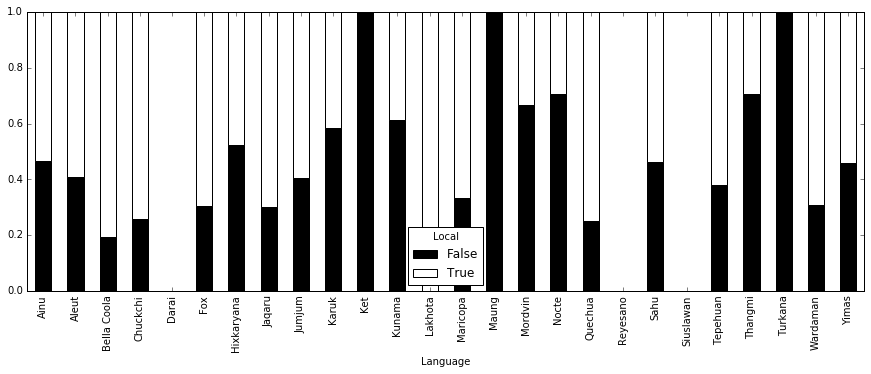

In [19]:
nf['All60/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

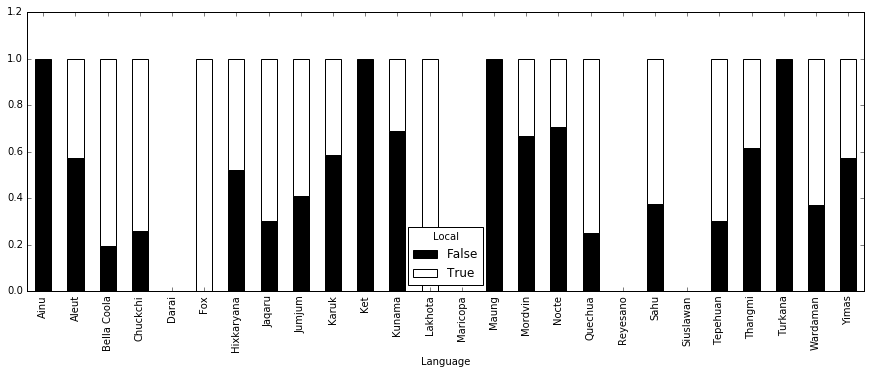

In [20]:
nf['All50/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

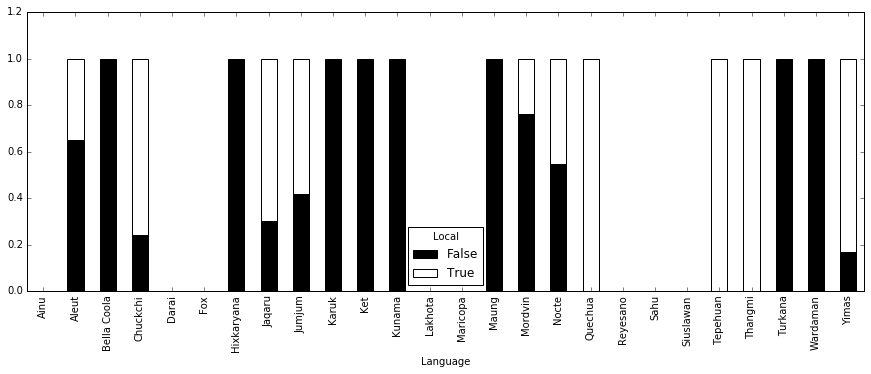

In [21]:
nf['All60'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

## Direct

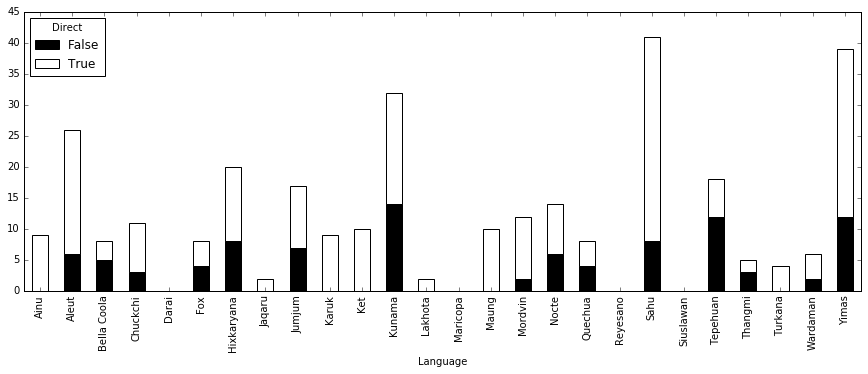

In [22]:
dff = tb[tb['Trans']].groupby(['Language', 'Discharger', 'Direct'])['Form'].count()\
    .unstack(['Discharger', 'Direct'])
dff['All50/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

In [23]:
ddf = 100 * dff / dff['None']
dnf = ddf.div(ddf.sum(axis=1, level='Discharger'), axis=0)
dnf.stack(['Direct', 'Discharger']).to_frame('Ratio').reset_index('Direct')\
    .groupby(level='Discharger').apply(lambda x: pearsonr(x, 'Direct', 'Ratio')).loc[disc]\
    .style.applymap(lambda x: x < .05 and 'background-color: lime' or '', subset=['p'])\
    .set_uuid('21')

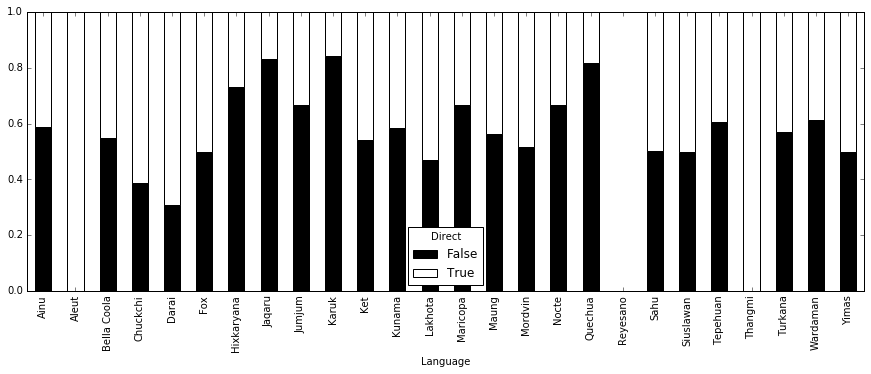

In [24]:
dnf['Intrans'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

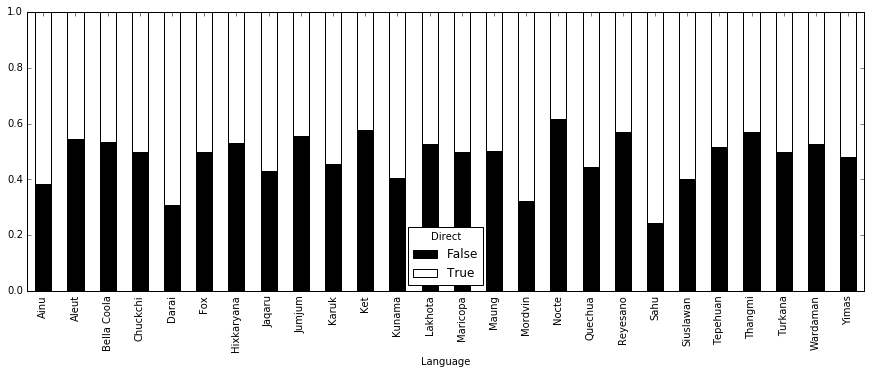

In [25]:
dnf['AllPerfect'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

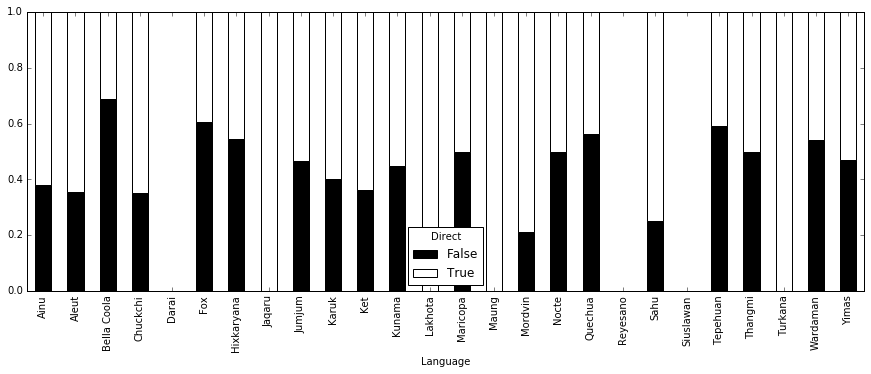

In [26]:
dnf['All60/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

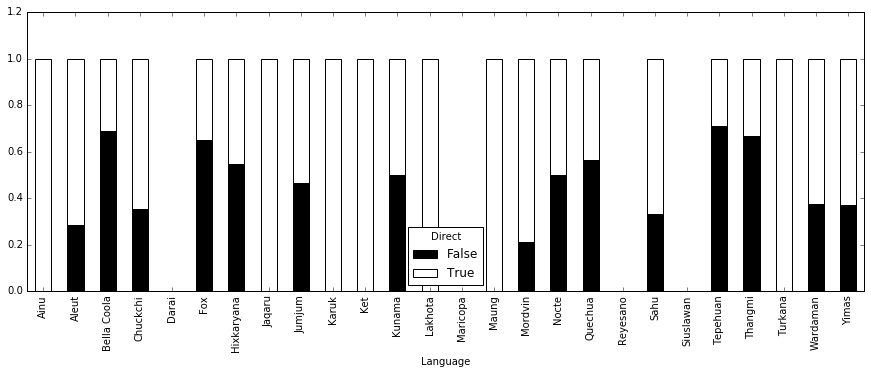

In [27]:
dnf['All50/100'].plot.bar(stacked=True, figsize=(15, 5), cmap=plt.cm.gray);

## Local & form contingency

In [28]:
ctl = crosstab(tb[tb['Trans']]\
    .set_index(['Language', 'Discharger', 'Cell', 'Local'])['Form'].notnull()\
    .unstack('Discharger')\
    .rename(columns={'None': 'Base'}).query('Base == 1').rename(columns={'Base': 'None'})\
    .stack('Discharger').to_frame('Form').reset_index(),
    ['Discharger', 'Language', 'Local'], 'Form')
ctl.stack('Form').unstack(['Discharger', 'Local']).fillna(0)[disc]

Discharger         None       Intrans       FreePerfect       Free60/100  \
Local             False True    False True        False True       False   
Language    Form                                                           
Ainu        False     0     0      10     4           4     2         10   
            True     29     8      19     4          25     6         19   
Aleut       False     0     0      18    18           6     0         19   
            True     45    18      27     0          39    18         26   
Bella Coola False     0     0       5     2           2     0         17   
            True     20     8      15     6          18     8          3   
Chuckchi    False     0     0       0     4           0     0         14   
            True     19     8      19     4          19     8          5   
Darai       False     0     0       6     6           4     6          4   
            True     20     8      14     2          16     2         16   
Fox         False     0     0       0     0           0     0          2   
            True     32     8      32     8          32     8         30   
Hixkaryana  False     0     0      14     4           2     0          6   
            True     22     6       8     2          20     6         16   
Jaqaru      False     0     0       4     0           1     0          3   
            True      7     3       3     3           6     3          4   
Jumjum      False     0     0      10     0           4     0          6   
            True     28     8      18     8          24     8         22   
Karuk       False     0     0      11     2           1     1          5   
            True     20     8       9     6          19     7         15   
Ket         False     0     0      10     0           8     0         32   
            True     84     8      74     8          76     8         52   
Kunama      False     0     0      10     2           5     0         15   
            True     57    18      47    16          52    18         42   
Lakhota     False     0     0      10     2           5     1         23   
            True     23     8      13     6          18     7          0   
Maricopa    False     0     0      12     0           0     0         12   
            True     16     8       4     8          16     8          4   
Maung       False     0     0      16     0           0     0          5   
            True     96     8      80     8          96     8         91   
Mordvin     False     0     0       0     1           0     0          9   
            True     20     8      20     7          20     8         11   
Nocte       False     0     0       8     0           2     4          8   
            True     20     8      12     8          18     4         12   
Quechua     False     0     0      14     0           5     0         15   
            True     24     8      10     8          19     8          9   
Reyesano    False     0     0      20     8           4     8         20   
            True     20     8       0     0          16     0          0   
Sahu        False     0     0      17     2          42     3         44   
            True     96     8      79     6          54     5         52   
Siuslawan   False     0     0       0     0           4     0          4   
            True     57    18      57    18          53    18         53   
Tepehuan    False     0     0       6     0           1     0          9   
            True     23     8      17     8          22     8         14   
Thangmi     False     0     0      10     6           2     2         14   
            True     20     8      10     2          18     6          6   
Turkana     False     0     0      18     6           0     0          6   
            True     20     8       2     2          20     8         14   
Wardaman    False     0     0       7     0           4     0          7   
            True     27     8      20     8     

In [29]:
ctl.groupby(level=['Discharger', 'Language']).apply(fisher_exact).query('p <= .05')\
    .assign(i=lambda x: map(disc.tolist().index, x.index.get_level_values('Discharger')))\
    .reset_index().set_index(['i', 'Discharger', 'Language']).sort_index()

odds             p
i Discharger  Language                            
1 Intrans     Aleut         0.000000  6.797740e-06
              Chuckchi      0.000000  3.988604e-03
              Darai         0.142857  4.405160e-02
              Maricopa           inf  1.346076e-03
              Quechua            inf  4.445680e-03
2 FreePerfect Darai         0.083333  1.104692e-02
              Nocte         0.111111  3.835006e-02
              Reyesano      0.000000  1.592610e-04
3 Free60/100  Bella Coola   9.444444  2.230330e-02
              Chuckchi      8.400000  3.322185e-02
              Darai         0.083333  1.104692e-02
              Ket                inf  4.700267e-02
4 Free50/100  Bella Coola   9.444444  2.230330e-02
              Chuckchi      8.400000  3.322185e-02
              Darai         0.083333  1.104692e-02
              Ket                inf  4.700267e-02
              Maung         0.074830  4.930952e-03
              Tepehuan           inf  9.625510e-03
5 Free60      Bella Coola   9.444444  2.230330e-02
              Darai         0.083333  1.104692e-02
              Ket                inf  1.902499e-02
              Kunama        0.000000  1.205725e-04
              Maung         0.093333  3.636695e-03
              Quechua      11.400000  9.898463e-03
              Siuslawan          inf  1.208441e-02
              Tepehuan           inf  3.802896e-05
6 AllPerfect  Darai         0.142857  4.405160e-02
              Ket           0.000000  3.339144e-05
              Nocte         0.111111  3.835006e-02
              Reyesano      0.000000  1.592610e-04
7 All60/100   Bella Coola   9.444444  2.230330e-02
              Chuckchi      8.400000  3.322185e-02
              Fox                inf  4.726994e-03
8 All50/100   Bella Coola   9.444444  2.230330e-02
              Chuckchi      8.400000  3.322185e-02
              Fox                inf  1.300311e-08
              Tepehuan           inf  9.625510e-03
9 All60       Kunama        0.000000  1.205725e-04
              Quechua            inf  1.946607e-03
              Tepehuan           inf  3.802896e-05
              Yimas         7.000000  1.254650e-02